In [1]:
import os
from os.path import isdir, join
import csv

from pathlib import Path
import pandas as pd
import time
#loadmat
from scipy.io import loadmat,savemat

# Math
#import numpy as np
import numpy as np 
np.set_printoptions(suppress=False) 
from scipy.fftpack import fft, dct
from scipy import signal
from scipy.stats import norm,multivariate_normal
from scipy.io import wavfile
import soundfile as sf
import audioread
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

#math
import math

%matplotlib inline

# Frame the problem

this is a simple multi-class recognition problem for recognizing the speaker

# 1. Import data

In [2]:
#audio_path = "D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test"
audio_path = "/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test"

we import all the data in the test file and stored them into the dictionary, each 'name' as keys in dictionary has length 10 list as value items, each of them is the samples read from wav files

In [3]:
def load_data(audio_train_path):
    Name_set={}
    test_set=[]
    count =0
    for area in os.listdir(audio_train_path):#os.listdit: to show the files in this path
        #for name in os.listdir(audio_train_path+'\\'+area+"\\"):
        if (area=='.DS_Store'):
            continue
        else:
            for name in os.listdir(audio_train_path+'/'+area+"/"):
                if (name =='.DS_Store'):
                    continue
                else:
                    Name_set.setdefault(name)  #add new key to the dict
                    sample_set=[]
                    #print (name)
                    #count +=1
                    #print (count)
                    #for files in os.listdir(audio_train_path+'\\'+area+'\\'+name+'\\'):
                    for files in os.listdir(audio_train_path+'/'+area+'/'+name+'/'):
                        #_,samples=wavfile.read(audio_train_path+'\\'+area+'\\'+name+'\\'+files)#read the wavfile , return sample_rate ,and samples
                        samples,_=sf.read(audio_train_path+'/'+area+'/'+name+'/'+files)
                        sample_set.append(samples)
                        Name_set[name]=sample_set
    return Name_set

In [4]:
dataset=load_data(audio_path)

In [5]:
dataset.keys()

dict_keys(['mgmm0', 'mtls0', 'fnmr0', 'frng0', 'mplb0', 'flkd0', 'frew0', 'mjrf0', 'fcrh0', 'mlll0', 'fadg0', 'mkcl0', 'fjmg0', 'mteb0', 'fmcm0', 'mdls0', 'mdrm0', 'fdms0', 'fedw0', 'fgjd0', 'mljb0', 'mroa0', 'fjlm0', 'flbw0', 'mpwm0', 'fcft0', 'mbns0', 'mrko0', 'fsem0', 'mpcs0', 'mjdm1', 'fmaf0', 'fslb1', 'mrcz0', 'mtmr0', 'mwvw0', 'mdld0', 'fdrd1', 'fjwb0', 'mtas1', 'fjas0', 'mgwt0', 'mjar0', 'fpas0', 'mcem0', 'fcmr0', 'mpgl0', 'mmdm2', 'mmdb1', 'mccs0', 'mrgg0', 'mdbb0', 'mabw0', 'mwew0', 'mpdf0', 'mbjk0', 'fram1', 'fjre0', 'fnlp0', 'mdrb0', 'mcrc0', 'mctt0', 'fjsa0', 'fawf0', 'mrrk0', 'mrjm3', 'fasw0', 'fmah0', 'mklt0', 'mcmb0', 'mahh0', 'mdac2', 'fhes0', 'mrws1', 'mfgk0', 'fcal1', 'fgmd0', 'msfh1', 'mdwa0', 'fjcs0', 'mbpm0', 'mdwk0', 'mlih0', 'fhew0', 'mrpp0', 'futb0', 'mjvw0', 'mjmp0', 'mkch0', 'mcsh0', 'mctw0', 'mjbr0', 'fcmh0', 'mglb0', 'mmjr0', 'mmab0', 'mmwh0', 'mbdg0', 'mtaa0', 'mmdh0', 'mbwm0', 'mjes0', 'mhpg0', 'mgjf0', 'mwjg0', 'mrtk0', 'mthc0', 'mjjg0', 'fpkt0', 'fkms0',

In [6]:
dataset.get('faks0','no such file')

[array([  9.15527344e-05,   6.10351562e-05,   1.22070312e-04, ...,
         -3.05175781e-05,  -9.15527344e-05,   9.15527344e-05]),
 array([  0.00000000e+00,   1.22070312e-04,   6.10351562e-05, ...,
          9.15527344e-05,   1.52587891e-04,   1.22070312e-04]),
 array([  1.83105469e-04,   2.74658203e-04,   3.35693359e-04, ...,
          3.05175781e-05,   0.00000000e+00,  -3.05175781e-05]),
 array([  6.10351562e-05,   1.83105469e-04,   9.15527344e-05, ...,
         -3.05175781e-05,   1.83105469e-04,  -6.10351562e-05]),
 array([  9.15527344e-05,   1.52587891e-04,   6.10351562e-05, ...,
          2.44140625e-04,   3.05175781e-04,   2.13623047e-04]),
 array([  1.52587891e-04,  -1.52587891e-04,  -3.05175781e-05, ...,
         -3.05175781e-05,  -1.83105469e-04,   2.13623047e-04]),
 array([  3.05175781e-05,   1.52587891e-04,   1.22070312e-04, ...,
          1.83105469e-04,   0.00000000e+00,   1.52587891e-04]),
 array([  0.00000000e+00,   1.83105469e-04,   2.44140625e-04, ...,
          1.5258

In [7]:
#pick up one wav file and analysis
samples=dataset.get('faks0','no such file')[0]
#samples=np.concatenate(samples)
#samples.shape

In [8]:
samples.shape

(56628,)

In [9]:
#we can acquire the number 16000 from the wav file
sample_rate=16000

In [10]:
#the wav time length
ms=1000*len(samples)/sample_rate

In [11]:
samples

array([  9.15527344e-05,   6.10351562e-05,   1.22070312e-04, ...,
        -3.05175781e-05,  -9.15527344e-05,   9.15527344e-05])

output the voice

In [12]:
#ipd.Audio("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test/dr7/fcau0/sa1.wav")
ipd.Audio("D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test\\dr7\\fcau0\\sa1.wav")


ValueError: could not convert string to float: 'D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test\\dr7\\fcau0\\sa1.wav'

visualize the voice

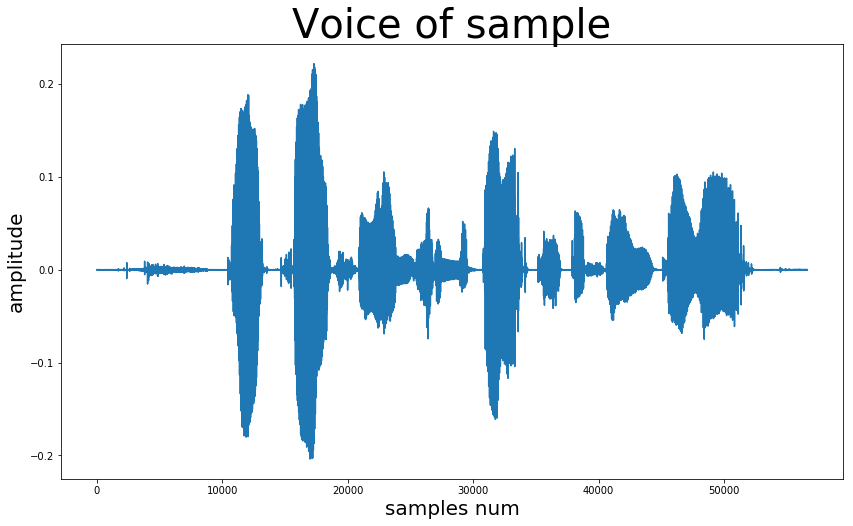

In [13]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(samples),len(samples)),samples) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.title("Voice of sample",fontsize=40)
plt.xlabel("samples num",fontsize=20)
plt.ylabel("amplitude",fontsize=20)
plt.show()

# 2. Frame segmentation

**Reason of Frame**  : the samples can be divided into frames because that on short time scales the audio signal doesn't change much (when we say it doesn't change, we mean statistically i.e. statistically stationary, obviously the samples are constantly changing on even short time scales).

if the frame size is too short, we can't get reliable spectral estimate, if too large, signal changed too much in one frame

In [291]:
t_feed=10 #feed time
t_frame=20 #frame time
fs=sample_rate/1000 #sample_rate of each ms 16
L_value=np.int(fs*t_frame) #320
L_value

320

In [292]:
def frame_segment(samples):
    #frame_num = K 
    frame_num=np.int((len(samples)-L_value)/(fs*t_feed))+1 #calculate the number of frames
    frame_set=[]
    for k in range(frame_num):
        frame_set.append(samples[k*np.int(fs*t_feed):k*np.int(fs*t_feed)+L_value])#[0,n] contains 0~n-1
    return frame_set,frame_num

In [293]:
frame_set,frame_num=frame_segment(samples) # frame_set:frames*320

In [294]:
np.array(frame_set).shape

(395, 320)

# 3. Voice activity detection

In [295]:
#combined function
def voice_activity_detection(frame_set,frame_num,gamma=10):
    #step1:figure out the noise signal power
    mixed_power_set=[]
    for k in range(frame_num):
        mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars
    #step2:The noise power
    t_n=100
    frame_drop=np.int((t_n/t_feed))
    no_speech_set=mixed_power_set[:frame_drop-1]
    noise_power_set=(1/frame_drop)*np.sum(no_speech_set)
    #step3: detective
    mixed_power_set=pd.Series(mixed_power_set)
    frame_set=pd.Series(frame_set)
    train_power_set=frame_set.loc[mixed_power_set>gamma*noise_power_set]
    #train_frame_set=[]
    #for index in train_power_set.index:
        #train_frame_set.append(frame_set[index])
    train_frame_set=np.array(list(train_power_set))
    return train_frame_set

In [296]:
train_frame_set=voice_activity_detection(frame_set,frame_num)
train_frame_set.shape  # train_frame_set:frames*320

(350, 320)

In [297]:
train_frame_set[0,:]

array([  1.52587891e-04,   3.05175781e-05,  -3.05175781e-05,
         9.15527344e-05,  -3.05175781e-05,   2.74658203e-04,
         2.13623047e-04,   0.00000000e+00,  -9.15527344e-05,
         6.10351562e-05,   3.35693359e-04,  -1.52587891e-04,
        -3.05175781e-05,   1.52587891e-04,  -3.05175781e-04,
         6.10351562e-05,   3.05175781e-05,  -3.05175781e-05,
         3.05175781e-04,   2.13623047e-04,   2.13623047e-04,
         1.83105469e-04,   6.40869141e-04,   6.40869141e-04,
        -3.66210938e-04,  -9.15527344e-05,  -1.52587891e-04,
        -1.22070312e-04,   3.35693359e-04,   2.13623047e-04,
        -1.83105469e-04,  -2.44140625e-04,   1.52587891e-04,
         9.46044922e-04,   1.70898438e-03,   8.23974609e-04,
        -1.09863281e-03,  -8.54492188e-04,   3.05175781e-04,
        -1.83105469e-04,  -1.52587891e-03,  -1.37329102e-03,
         3.05175781e-04,   1.03759766e-03,   2.74658203e-04,
        -1.12915039e-03,  -7.32421875e-04,   1.52587891e-04,
         3.05175781e-05,

## Step 1:

try to figure out the noise signal power from the mixed signal power

In [298]:
mixed_power_set=[]
for k in range(frame_num):
    mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars

In [299]:
len(mixed_power_set)

395

In [300]:
mixed_power_set

[1.247681211680174e-08,
 1.2508826330304146e-08,
 1.2925011105835438e-08,
 1.4808028936386109e-08,
 3.6472920328378679e-08,
 3.6950223147869114e-08,
 1.3932003639638425e-08,
 1.0983785614371301e-08,
 1.2206146493554116e-08,
 1.437729224562645e-08,
 1.5844125300645828e-08,
 1.5672412700951099e-08,
 7.0565147325396535e-08,
 7.2672264650464058e-08,
 1.9234721548855307e-08,
 2.1728919818997384e-08,
 2.5192275643348695e-08,
 3.1816307455301286e-08,
 3.8530561141669753e-08,
 5.12140104547143e-08,
 5.5841519497334958e-08,
 1.2290256563574077e-07,
 2.1010491764172912e-06,
 5.581040750257671e-06,
 4.6734348870813847e-06,
 2.5895104045048359e-06,
 3.6070006899535658e-06,
 3.1454343115910889e-06,
 1.5337805962190033e-06,
 1.299637369811535e-06,
 1.3409677194431425e-06,
 1.4081218978390099e-06,
 1.717390841804445e-06,
 1.22754427138716e-06,
 7.1981339715421206e-07,
 7.2530820034444336e-07,
 6.4693740569055087e-07,
 5.2218092605471611e-07,
 5.0517846830189226e-07,
 4.8053334467113018e-07,
 5.024514

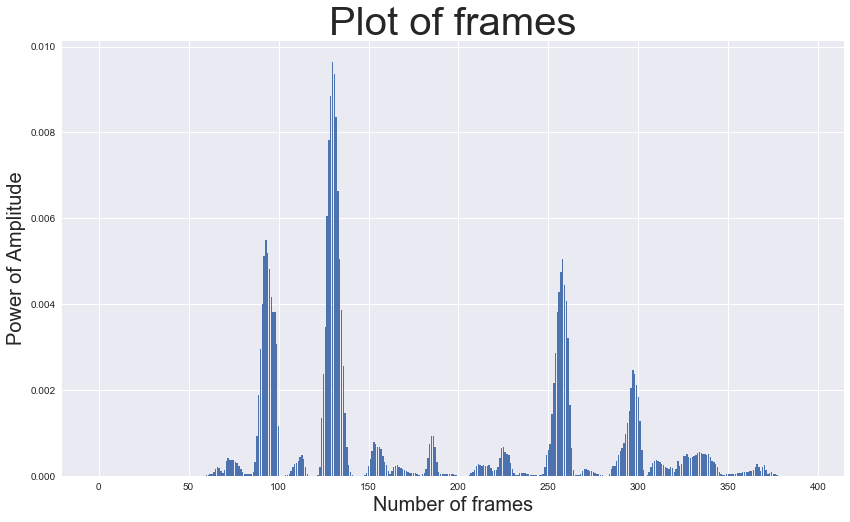

In [301]:
plt.figure(figsize=(14,8))
plt.bar(range(frame_num),mixed_power_set)  #plt,bar(index,height(value))
plt.title("Plot of frames",fontsize=40)
plt.ylabel("Power of Amplitude",fontsize=20)
plt.xlabel("Number of frames",fontsize=20)
plt.show()

## Step 2:

drop first $t_{n}$ samples becasue of silence

In [302]:
t_n=100
K_drop=np.int((t_n/t_feed))

In [303]:
len(frame_set)

395

In [304]:
no_speech_set=mixed_power_set[:K_drop-1]
noise_power_set=(1/K_drop)*np.sum(no_speech_set)

In [305]:
noise_power_set

1.632637577131391e-08

## Step 3

try to find a $\gamma$ as the threshold to satisfied that :
$$P(k)\lessgtr\gamma * P_{N}$$, only the frames containing speech should be used to train the classification model

In [306]:
gamma=10
mixed_power_set=pd.Series(mixed_power_set)

In [307]:
frame_set=pd.Series(frame_set)
train_power_set=frame_set.loc[mixed_power_set>gamma*noise_power_set]
train_power_set

22     [0.000152587890625, 3.0517578125e-05, -3.05175...
23     [0.000274658203125, -0.00048828125, 0.00030517...
24     [0.000152587890625, 0.00115966796875, -0.00106...
25     [0.00167846679688, 0.0028076171875, -9.1552734...
26     [0.00091552734375, 0.00494384765625, -0.001098...
27     [-0.000152587890625, -0.0079345703125, -0.0099...
28     [-0.00210571289063, -0.00222778320313, 0.00033...
29     [-0.000701904296875, 0.000396728515625, -0.000...
30     [0.000823974609375, -0.0008544921875, -0.00140...
31     [-0.002685546875, -0.000640869140625, 0.000854...
32     [0.000213623046875, 0.000274658203125, -0.0015...
33     [-0.00137329101563, 6.103515625e-05, 0.0014648...
34     [0.0010986328125, 0.00103759765625, -0.0001525...
35     [-0.00079345703125, -0.000457763671875, 0.0019...
36     [-0.000335693359375, -0.00048828125, -6.103515...
37     [0.000396728515625, 0.00115966796875, 9.155273...
38     [-0.000152587890625, 0.00030517578125, 0.00115...
39     [-0.000823974609375, 0.0

In [308]:
train_power_set=np.array(list(train_power_set))

# 4. Feature extraction

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. 

**Window**

we use Von_Hann_Fester to minimize the effect 

In [309]:
def window_func(train_frame_set):
    window = np.hanning(len(train_frame_set[0]))  #different in matlab
    #window = np.hamming(len(train_frame_set[0]))
    train_frame_set=np.float64(train_frame_set)
    frame_windowed_set=np.multiply(train_frame_set,window) # apply the window to the frames
    #using np.multiply , multipy by elements
    return frame_windowed_set

we plot the hanning window and see

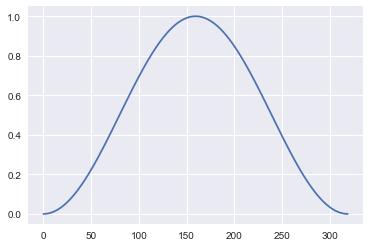

In [317]:
#window on the time domain
plt.plot(range(len(train_frame_set[0])),np.hanning(len(train_frame_set[0]))) ####
plt.show()

In [318]:
#the window on the frequency domain
pow_frames_window,mag_frames_window=Flourier_transfer(np.hanning(len(train_frame_set[0])),NFFT)

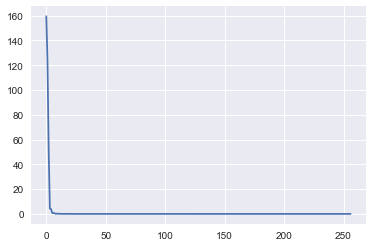

In [319]:
plt.plot(mag_frames_window)
plt.show()

In [320]:
frame_windowed_set= window_func(train_frame_set) # frame_windowed_set:frames*320

In [321]:
frame_windowed_set.shape

(350, 320)

In [322]:
frame_windowed_set

array([[  0.00000000e+00,   2.95974574e-09,  -1.18378347e-08, ...,
         -1.53891852e-07,   8.58326264e-08,   0.00000000e+00],
       [  0.00000000e+00,  -4.73559318e-08,   1.18378347e-07, ...,
         -1.18378347e-07,  -3.69968217e-07,  -0.00000000e+00],
       [  0.00000000e+00,   1.12470338e-07,  -4.14324216e-07, ...,
         -4.97189059e-07,  -1.50947033e-07,   0.00000000e+00],
       ..., 
       [ -0.00000000e+00,   2.95974574e-09,   1.06540513e-07, ...,
         -3.31459373e-07,  -9.17521179e-08,  -0.00000000e+00],
       [  0.00000000e+00,  -1.77584744e-08,   5.91891737e-08, ...,
         -4.73513390e-08,  -2.95974574e-09,   0.00000000e+00],
       [ -0.00000000e+00,  -4.43961861e-08,  -1.77567521e-07, ...,
          1.42054017e-07,   1.47987287e-08,   0.00000000e+00]])

** Fourier-Transform and Power Spectrum**

When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

We would generally perform a 512 point FFT and keep oly the first 257 coefficents.

In [323]:
NFFT=512
#mag_frames = np.absolute(np.fft.rfft(sample_frame, NFFT))  # Magnitude of the FFT
#mag_frames = np.absolute(np.fft.fft(sample_frame, NFFT))
def Flourier_transfer(frame_windowed_set,NFFT):
    mag_frames = np.absolute(np.fft.rfft(frame_windowed_set, NFFT)) 
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) 
    return pow_frames,mag_frames

In [324]:
pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)

In [325]:
pow_frames

array([[  2.11889657e-08,   7.43277667e-08,   1.25368314e-07, ...,
          8.72434997e-10,   7.01906271e-10,   2.27688252e-09],
       [  3.47672631e-07,   3.69749179e-07,   2.98517968e-07, ...,
          1.09317128e-07,   4.48656896e-08,   2.25014992e-09],
       [  1.87615962e-07,   7.22302388e-08,   7.60852056e-08, ...,
          4.78092199e-09,   5.61756082e-08,   9.89509110e-08],
       ..., 
       [  4.84586443e-07,   3.31239763e-07,   5.41179548e-08, ...,
          8.60172789e-10,   3.44606518e-10,   7.48129357e-11],
       [  6.05334123e-09,   8.11112396e-08,   2.37326810e-07, ...,
          9.81167612e-11,   4.66336069e-10,   6.78824374e-10],
       [  5.05647483e-07,   3.23070924e-07,   8.95909261e-08, ...,
          5.76247982e-10,   1.69768341e-10,   4.73702727e-11]])

In [326]:
#leak = unwindowed
pow_frames_leak,mag_frames_leak=Flourier_transfer(train_frame_set,NFFT)

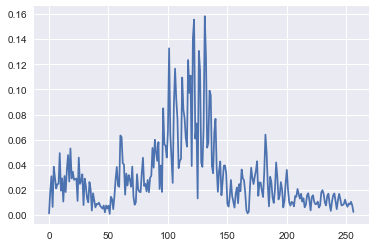

In [327]:
plt.plot(mag_frames_leak[1,:]) # without window(with spectral leakage)

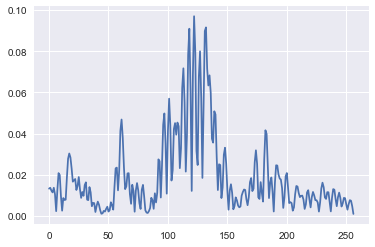

In [328]:
plt.plot(mag_frames[1,:]) # the frequency of each frame(with window)

**Mel Scale Function**

In [329]:
def Mel_scale(freq_orig):
    if freq_orig <= 1000:
        f_mel = freq_orig
    else:
        f_mel = 2595 * np.log10(1 + (freq_orig/2) / 700)
    return f_mel

** Mel Scale Inverse Function**

In [330]:
def Mel_scale_inv(f_mel):
    if f_mel > 1000:
        f_orig = 700 * (10**(f_mel / 2595) - 1)
    else:
        f_orig=f_mel
    return f_orig

In [331]:
#sample_rate=16000
nfilt = 22
def mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt):
    low_freq_mel = 0
    #(sample_rate/2)??? because of rfft?
    high_freq_mel = Mel_scale(sample_rate)  # Convert Hz to Mel #Mel Scale function 
    # nfilt + 2: add the boundary points
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points=[]
    for item in mel_points:
        hz_points.append(Mel_scale_inv(item)) # Convert Mel to Hz  # Power Spectrum # Inverse function
    hz_points=np.array(hz_points)
    bins = np.floor((NFFT + 1) * hz_points / sample_rate)
    # fbank = Figure 3.9 22 triangular filter set
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bins[m - 1])   # left
        f_m = int(bins[m])             # center
        f_m_plus = int(bins[m + 1])    # right
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    #filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability #np.where: return the index of filter_banks == 0
    #filter_banks = 20 * np.log10(filter_banks)  # dB
    return filter_banks.T,fbank,hz_points

then we plot the mel filter bank and see

In [332]:
filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)

In [333]:
filter_banks.shape

(22, 350)

In [334]:
def mel_plot(fbank,hz_points):
    plt.figure(figsize=(14,8))
    plt.title("mel-filter-bank",size=30)
    plt.xlabel("frequency",size=20)
    plt.ylabel("Amplitude",size=20)
    
    for i in range(fbank.shape[0]):
        plt.plot(np.linspace(0,np.int32(hz_points[-1]),(NFFT+2)/2),fbank[i])
    plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



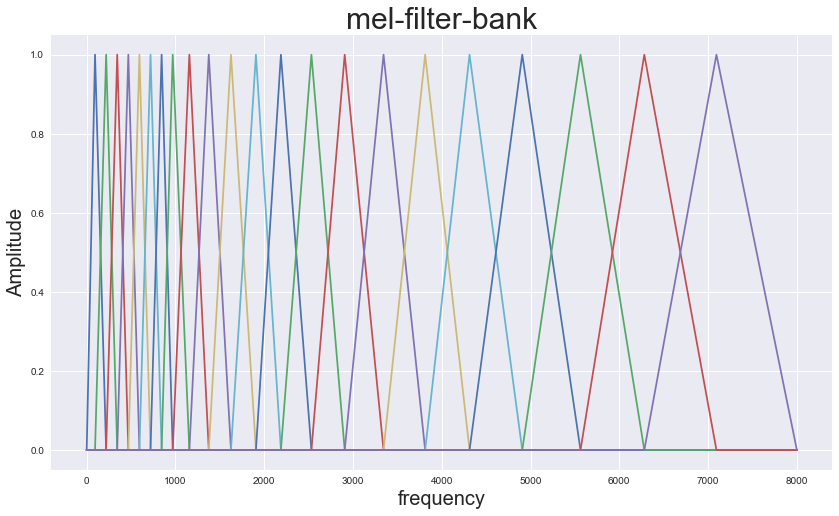

In [335]:
mel_plot(fbank,hz_points)

calculate the feature vectore $\underline{b}$ using DCT

In [336]:
num_features = 15 
#b_n = np.zeros((num_features,303))
#train_frame_set = (303,320)
def DCT(Y,num_features):
    b_set=[]
    for n_value in range(num_features): 
        b_n =0
        for m in range(Y.shape[0]):
            b_n+=np.multiply(np.log10(Y[m]),np.cos(math.pi*(n_value+1)*(m-0.5)/(Y.shape[0])))#ignore the mean a
            #abandon the n=0
        b_set.append(b_n)
    b_set=np.array(b_set)
    return b_set

In [337]:
filter_banks[0].shape

(350,)

In [338]:
filter_banks.shape

(22, 350)

In [339]:
b_new = DCT(filter_banks,num_features) #b_new:features(15)*frames
b_new.shape

(15, 350)

In [340]:
b_new[:,100]

array([  9.86024512, -10.29223407, -16.40565278,  -3.72371107,
       -13.64182736,   0.17380246, -12.7338779 ,   1.07541746,
        -8.44957845,  -1.82996944,  -7.1383189 ,  -2.31331742,
        -7.41073035,   0.20256262,  -4.5240521 ])

In [341]:
#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)

In [342]:
ubm_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'var', 'K', 'weights', 'D', 'means'])

In [343]:
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights'].ravel()
ubm_var_set=[]
K_value=49

#transfer variance of UBM to cov
for k in range(K_value):
    ubm_var_set.append(np.diag(ubm_var[k]))
ubm_var_set=np.array(ubm_var_set)
ubm_var=ubm_var_set

In [344]:
ubm_means.shape

(49, 15)

In [345]:
b_new.shape

(15, 350)

# 5. Probabilistic model of speech

## 5.1: Universal Background Model

naive GMM-UBM --**ubm_value_set:**$$P_{UBM}(\underline{b})=\sum_{k=1}^{K}\omega_{UBM,k}*p(\underline{b}|\underline{\mu}_{UBM,k},C_{UBM,k})$$

In [371]:
b_new=pd.read_csv('D:\\features.csv',header=None)
b_new=np.array(b_new)

In [217]:
K_value=ubm_var.shape[0] #number of naive models
T_value=b_new.shape[1] #number of frames

In [218]:
ubm_means[0]

array([-17.8028021 ,   1.38120814,   4.09317523,  -3.57885659,
        -0.10364783,   0.46219983,  -1.6222795 ,   0.19985011,
         0.10969629,  -0.20741409,   0.14692962,  -0.11613068,
        -0.01942129,  -0.08583574,  -0.14786522])

In [219]:
np.dot(np.dot((b_new[:,0]-ubm_means[0]).T,np.linalg.inv(ubm_var[0,:,:])),(b_new[:,0]-ubm_means[0]))

16.51492354339495

In [220]:
np.exp((-0.5)*np.dot(np.dot((b_new[:,0]-ubm_means[0]).T,np.linalg.inv(ubm_var[0,:,:])),(b_new[:,0]-ubm_means[0])))

0.00025931636071828526

In [221]:
b_new

array([[ -4.265   ,  -7.3444  ,  -3.582   , ...,  11.524   ,  13.813   ,
          3.0164  ],
       [  0.34972 ,   1.4833  ,  -0.30921 , ...,  -0.91792 ,   1.7305  ,
         -7.3778  ],
       [  3.1161  ,   3.9108  ,   6.4346  , ...,   9.1431  ,   8.2644  ,
          1.0751  ],
       ..., 
       [  0.23001 ,  -0.3394  ,   0.17475 , ...,   0.50543 ,   0.2249  ,
         -0.56077 ],
       [ -0.54544 ,  -2.0161  ,  -0.74392 , ...,  -1.7718  ,  -1.0277  ,
         -0.14971 ],
       [  0.31035 ,   0.40981 ,   0.050748, ...,  -0.30271 ,  -0.53722 ,
         -0.13597 ]])

In [222]:
# probability density function
def density_func(b_new,ubm_means,ubm_var,T_value_1,K_value_1):
    D=b_new.shape[0]
    prob=(1/((2*math.pi)**(D/2)*(np.linalg.det(ubm_var[K_value_1,:,:]))**(1/2)))*\
    np.exp((-0.5)*np.dot(np.dot((b_new[:,T_value_1]-ubm_means[K_value_1]).T,np.linalg.inv(ubm_var[K_value_1,:,:])),(b_new[:,T_value_1]-ubm_means[K_value_1])))
    return prob
    

In [224]:
#calculate the naive GMM-UBM
def naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value):
    ubm_value_set=[]
    for t in range(T_value): 
        ubm_pdf=0
        for i in range(K_value):                                                      
            ubm_pdf+=ubm_weights[i]*density_func(b_new,ubm_means,ubm_var,t,i)
        #print(ubm_pdf)
        ubm_value_set.append(ubm_pdf)
        #prob_ubm=np.array(prob_ubm)
       # ubm_value = np.dot(ubm_weights,prob_ubm)
        #ubm_value = np.dot(ubm_weights,prob_ubm).flatten()
    ubm_value_set=np.array(ubm_value_set)
    return ubm_value_set

In [225]:
start=time.time()
ubm_value_set=naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value)
print(time.time()-start)

18.15688943862915


In [228]:
ubm_value_set.shape

(2671,)

## 5.2 Speaker models adaption

GMM model for a particular speaker with his training data is adapted from the UBM-GMM in equation by modifying the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$,first we calcualte the posteriori probability $$p=\frac{a}{b},1\leq t\leq T$$

### 5.2.1 posteriori probability

In [229]:
ubm_value_set

array([  3.60365525e-13,   6.33783317e-16,   1.05379717e-13, ...,
         3.57853149e-15,   3.26261320e-15,   3.33183198e-13])

In [230]:
def post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value):
    model_set=[] #include 49 models
    for k in range(K_value):
        frame_set=[] #include number of frames
        for t in range(T_value):
            frame_set.append(ubm_weights[k]*density_func(b_new,ubm_means,ubm_var,t,k)/ubm_value_set[t])
        frame_set=np.array(frame_set)
        model_set.append(frame_set)
    model_set=np.array(model_set)
    return model_set.reshape(model_set.shape[0],model_set.shape[1])

In [231]:
model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)

In [232]:
model_set.shape

(49, 2671)


### 5.2.2 Mean

In [233]:
def mu_model(model_set,b_new):
    #b_new: features*frames
    #model_set:models*frames
    value_temp=np.dot(model_set,b_new.T)
    mu_ubm=np.multiply((1/np.sum(model_set,axis=1)),value_temp.T)
    return mu_ubm.T

In [234]:
mu_ubm=mu_model(model_set,b_new)

In [235]:
mu_ubm.shape

(49, 15)

In [236]:
mu_ubm

array([[ -1.57931181e+01,   7.91791964e-01,   4.59837359e+00,
         -3.43739456e+00,  -1.06813053e+00,   3.16678183e-02,
         -6.28642253e-01,  -2.35256808e-01,   2.78392855e-01,
         -9.87782872e-01,   5.09188701e-01,   5.32480089e-01,
         -3.24817047e-01,  -8.13959002e-01,   1.55640019e-01],
       [  1.36922043e+01,  -4.62969801e+00,   3.34320946e+00,
         -3.38124195e+00,  -2.13308644e+00,  -1.45680891e+00,
         -5.07966256e+00,   9.64441246e-01,  -7.95350760e-01,
         -2.32006870e-01,  -7.95873332e-01,   1.91371804e-01,
          1.24039194e+00,  -9.86626343e-01,  -8.25851051e-01],
       [  6.36650338e+00,   1.22485044e-01,   1.20205178e+01,
         -4.07634452e+00,  -4.02033971e+00,   2.75620493e-01,
         -1.49105425e+00,  -1.07570355e+00,  -2.93623532e+00,
          2.03080198e-01,   2.50940567e-01,  -1.72262046e+00,
          3.57359657e-01,  -1.03888659e+00,  -7.29893067e-01],
       [  1.85751300e+01,  -3.27098998e+00,  -1.56016636e+00,
     

### 5.2.3 Covariance

In [237]:
'''
def cov_model(model_set,b_new,mu_ubm,T_value):
    value_temp = []
    b_temp = []
    sum_temp=[]
    mu_temp =[]
    cov_set =[]
    #calculate mu*mu.T
    for m in range(K_value):
        mu_temp.append(np.diag(mu_ubm[m,:]**2))
    mu_temp=np.array(mu_temp)
    #calculate b*b.T
    for t in range(T_value):
        b_temp.append((b_new[:,t]**2))
    b_temp=np.array(b_temp)
    print(b_temp.shape)
    #calculate sum(p(k|b)*b*b.T)
    value_temp=np.dot(model_set,b_temp)
    #value_temp=value_temp.reshape(K_value,15,15)
    #sum(p(k|b))
    sum_value = np.sum(model_set,axis=1)
    #calculate cov
    for k in range(K_value):
        cov_set.append(np.diag((1/sum_value[k])*value_temp[k])-mu_temp[k,:,:])
    cov_set=np.array(cov_set)
    return cov_set
'''

'\ndef cov_model(model_set,b_new,mu_ubm,T_value):\n    value_temp = []\n    b_temp = []\n    sum_temp=[]\n    mu_temp =[]\n    cov_set =[]\n    #calculate mu*mu.T\n    for m in range(K_value):\n        mu_temp.append(np.diag(mu_ubm[m,:]**2))\n    mu_temp=np.array(mu_temp)\n    #calculate b*b.T\n    for t in range(T_value):\n        b_temp.append((b_new[:,t]**2))\n    b_temp=np.array(b_temp)\n    print(b_temp.shape)\n    #calculate sum(p(k|b)*b*b.T)\n    value_temp=np.dot(model_set,b_temp)\n    #value_temp=value_temp.reshape(K_value,15,15)\n    #sum(p(k|b))\n    sum_value = np.sum(model_set,axis=1)\n    #calculate cov\n    for k in range(K_value):\n        cov_set.append(np.diag((1/sum_value[k])*value_temp[k])-mu_temp[k,:,:])\n    cov_set=np.array(cov_set)\n    return cov_set\n'

In [238]:
def cov_model(model_set,b_new,mu_ubm,T_value):
    #mu_ubm: models*features
    #b_new: features*frames
    #model_set:models*frames
    cov_set =[]
    #calculate mu*mu.T
    for k in range(K_value):
        mu_temp=np.dot(mu_ubm[k,:].reshape(-1,1),mu_ubm[k,:].reshape(1,-1))
        #print(mu_temp.shape)
        value_temp=1/np.sum(model_set[k,:])
        sum_temp=0
        for t in range(T_value):
            b_temp=np.dot(b_new[:,t].reshape(-1,1),b_new[:,t].reshape(1,-1))
            #print(b_temp.shape)
            sum_temp+=model_set[k,t]*b_temp
        #print(np.diag(value_temp*sum_temp-mu_temp).shape)
        cov_set.append(np.diag(np.diag(value_temp*sum_temp-mu_temp)))
    cov_set=np.array(cov_set)
    return cov_set

In [239]:
cov_set=[]
cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
cov_set.shape

(49, 15, 15)

In [240]:
cov_set

array([[[ 10.46009253,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   2.38779016,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   1.82650023, ...,   0.        ,
           0.        ,   0.        ],
        ..., 
        [  0.        ,   0.        ,   0.        , ...,   0.41295858,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.58551011,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.50132942]],

       [[  8.46229927,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   9.90283663,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   8.12920397, ...,   0.        ,
           0.        ,   0.        ],
        ...,

### 5.2.4 Weight 

weight of K mode

In [241]:
def weight_model(model_set,T_value):
    return (1/T_value)*np.sum(model_set,axis=1)

In [242]:
weights_model=weight_model(model_set,T_value)

In [243]:
weights_model.shape

(49,)

In [244]:
weights_model

array([ 0.01827909,  0.01496524,  0.01893136,  0.0115    ,  0.03222028,
        0.01159928,  0.02532195,  0.00896702,  0.06916169,  0.07141957,
        0.00587423,  0.01613838,  0.01393349,  0.01961844,  0.01431784,
        0.01591978,  0.00549951,  0.00657159,  0.01867403,  0.01023497,
        0.02582884,  0.03206474,  0.02805098,  0.02300143,  0.03825919,
        0.00258692,  0.0046894 ,  0.00719538,  0.01115273,  0.00917845,
        0.01341381,  0.0474403 ,  0.01380058,  0.0088919 ,  0.00415237,
        0.02240504,  0.04298148,  0.01636647,  0.01628192,  0.02245766,
        0.02305489,  0.07222784,  0.00864151,  0.018012  ,  0.02022246,
        0.03254059,  0.00239887,  0.00582702,  0.01772747])

In [245]:
2.36957481e-41

2.36957481e-41

In [246]:
np.sum(weights_model)

0.99999999999999989

## 5.3 Speaker model adaption

Now we combine the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ of the k_th mode of the UBM-GMM with $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ to obtain the paramenters of the adapted k-th mode of the speaker specific GMM:
$$p=\frac{a}{b},1\leq t\leq T$$

In [247]:
#gamma_UBM = 0.0000000000000000000000000000000001 
#gamma_UBM=0.1
#alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

Function:adapted_mode to update k_th mode of the speaker specific GMM

In [380]:
def adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=1):
    
    #caculate alpha
    alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

    #caculate the adapted mean
    new_mu=np.multiply(alpha,mu_ubm.T)+np.multiply((1-alpha),ubm_means.T)

    #calculate adapted variance    
    new_cov=np.multiply(alpha,cov_set.T)+np.multiply((1-alpha),ubm_var.T)
    #print(new_cov[0])
    #calculate adapted mean
    new_weight=np.multiply(alpha,weights_model)+np.multiply((1-alpha),ubm_weights.ravel())
    return new_mu.T,new_cov.T,new_weight.ravel()

Function:save_model() to store the set of paraments for each model

In [354]:
def save_model(name,new_mu,new_cov,new_weight):
    save_path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"\
    +str(name)+".mat"
    #save_path="/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/"\
    #+str(name)+".mat"
    savemat(save_path,{'mu':new_mu,'new_cov':new_cov,'new_weight':new_weight})   

In [381]:
new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights)

In [382]:
new_weight

array([ 0.01826155,  0.01504222,  0.01900021,  0.01170328,  0.03214314,
        0.01221951,  0.02515396,  0.00959369,  0.06890696,  0.07117837,
        0.00654439,  0.01617404,  0.01431949,  0.01968559,  0.01446936,
        0.01584465,  0.00642012,  0.00698855,  0.01848729,  0.01055417,
        0.025873  ,  0.03211863,  0.02797093,  0.02289697,  0.03811243,
        0.00444238,  0.0062982 ,  0.00806575,  0.01126915,  0.00937506,
        0.01374242,  0.0472398 ,  0.01399819,  0.00906004,  0.00521143,
        0.02227873,  0.04283551,  0.01626697,  0.01621638,  0.0223825 ,
        0.02303803,  0.07191741,  0.00893729,  0.01817835,  0.02026525,
        0.03240287,  0.00475271,  0.0061599 ,  0.01822949])

In [357]:
save_model('mrpc0',new_mu,new_cov,new_weight)

# 6: Speaker identification

In [358]:
#identification
def identification(b_test,new_mu,new_cov,new_weight,T_value):
    #caculate the concatenated probability
    test_pdf=naive_G_U(b_test,new_mu,new_cov,new_weight,T_value)
    #print(test_pdf)
    concate_prob=np.sum(np.log(test_pdf))
    return concate_prob

In [359]:
new_cov[0]

array([[ 10.76799823,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   2.46029085,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.87114179,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.94992964,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.  

In [372]:
b_test_1=b_new[:,:300]
b_test_2=np.array(pd.read_csv('D:\\feature_test_4.csv',header=None))[:,:300]

In [373]:
ubm_weights[48]

0.042000085581627045

In [374]:
K_value

49

In [375]:
new_weight.shape

(49,)

In [376]:
concate_prob_1=identification(b_test_1,new_mu,new_cov,new_weight,300)

In [377]:
concate_prob_1

-8837.7177212727438

In [366]:
concate_prob_2=identification(b_test_2,new_mu,new_cov,new_weight,300)

In [367]:
concate_prob_2

-9849.1160258374202

# 7. Cross Validation

In [383]:
def feature_eng(dataset):
    #2. frame_segmentation
    frame_set,frame_num=frame_segment(dataset)
    
    #3. Voice activaty detection
    #gamma = 100.0
    train_frame_set=voice_activity_detection(frame_set,frame_num,gamma=10)
    
    #4.1 window_func
    frame_windowed_set= window_func(train_frame_set)
    
    #4.2 fft
    pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)
    
    #4.3 filtered
    filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)
    
    #4.4 get featured 
    b_new = DCT(filter_banks,num_features)
    return b_new

In [384]:
def speaker_adapted(b_new,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value):
    model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)
    
    mu_ubm=mu_model(model_set,b_new)
    
    cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
    
    weights_model=weight_model(model_set,T_value)
    
    new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=1)
    
    return new_mu,new_cov,new_weight

now we apply the cross validation onto 10 people

In [385]:
#cross validation for 20 models
#default 
t_feed=10 #feed time
t_frame=20 #frame time
sample_rate=16000
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
NFFT=512
nfilt=22

# extract the wav files 
test_file_set=[]
name_set=[]
start=time.time()
for name in ['faks0', 'fdac1', 'felc0', 'fjem0',\
             #'mdab0', 'mjsw0', 'mreb0', 'mrjo0', \
             #'msjs1', 'mstk0', 'mwbt0', 'fcmr0',\
             #'fdrd1', 'fjas0', 'fjre0', 'fjwb0', \
             'fpas0', 'fram1', 'fslb1', 'mabw0']:
    whole_set=dataset.get(name,'no such file').copy()
    
    print("now the this model is for person "+name)
    print("Model Start")
    #add copy to prevent original change
    #score_set=[]
    
    #obtain test and train set, (test set temporarily use the first file)
    test_file=whole_set[0]
    test_file_set.append(test_file)
    name_set.append(name)
    train_set=whole_set.copy()
    train_set.remove(test_file)
    train_set=np.concatenate(train_set)
    #feature engineering 
    K_value=ubm_var.shape[0] #number of naive models
    
    b_train=feature_eng(train_set)
    
    T_value=b_train.shape[1] #number of frames
    #5.1 naive GMM-UBM
    ubm_value_set=naive_G_U(b_train,ubm_means,ubm_var,ubm_weights,T_value)
    
    #5.2 Speaker adaption
    new_mu,new_cov,new_weight=speaker_adapted(b_train,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value)
    #print(b_test.shape,new_mu.shape,new_cov.shape,new_weight.shape)
    save_model(name,new_mu,new_cov,new_weight)
    
    print(str(name)+" spend time %5.1f minute"%((time.time()-start)/60))
    
print("Traing compeleted")
    
    
    

now the this model is for person faks0
Model Start
faks0 spend time   0.7 minute
now the this model is for person fdac1
Model Start
fdac1 spend time   1.5 minute
now the this model is for person felc0
Model Start
felc0 spend time   2.1 minute
now the this model is for person fjem0
Model Start
fjem0 spend time   2.8 minute
now the this model is for person fpas0
Model Start
fpas0 spend time   3.3 minute
now the this model is for person fram1
Model Start
fram1 spend time   4.0 minute
now the this model is for person fslb1
Model Start
fslb1 spend time   4.5 minute
now the this model is for person mabw0
Model Start
mabw0 spend time   5.0 minute
Traing compeleted


In [387]:
# identification 20 stucks cross validation 
print("Model Start")
start=time.time()
score_set=[]
correct_num=0
false_num=0

for index_2,test_file in enumerate(test_file_set):
    test_set=np.array(test_file)
    K_value=ubm_var.shape[0] #number of naive models
    b_test=feature_eng(test_set)
    T_value=b_test.shape[1]
    eva_set=[]
    for index_1,name in enumerate(name_set):
        path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"+str(name)+".mat"
        print("the test set is from "+str(name_set[index_2])+" testing the model "+str(name))
        lamda=loadmat(path,mat_dtype=True)
        new_mu=lamda['mu']
        new_cov=lamda['new_cov']
        new_weight=lamda['new_weight'].ravel()
        scores=identification(b_test,new_mu,new_cov,new_weight,T_value)
        print("test score is ",scores)
        print("time cost %5.1f minute"%((time.time()-start)/60))
        eva_set.append(scores)
    test_name=name_set[eva_set.index(max(eva_set))]
    
    # calculate the detection rate
    if name_set[index_2] == test_name:
        correct_num +=1
    else:
        false_num +=1
print("the detection ratio is ",correct_num/(correct_num+false_num))
        
        
        
        
        
        

Model Start
the test set is from faks0 testing the model faks0
test score is  -12108.7538918
time cost   0.0 minute
the test set is from faks0 testing the model fdac1
test score is  -12625.986584
time cost   0.1 minute
the test set is from faks0 testing the model felc0
test score is  -13565.7023212
time cost   0.1 minute
the test set is from faks0 testing the model fjem0
test score is  -12801.2632091
time cost   0.2 minute
the test set is from faks0 testing the model fpas0
test score is  -12920.957951
time cost   0.2 minute
the test set is from faks0 testing the model fram1
test score is  -12708.704662
time cost   0.2 minute
the test set is from faks0 testing the model fslb1
test score is  -12610.4558407
time cost   0.3 minute
the test set is from faks0 testing the model mabw0
test score is  -12802.9803027
time cost   0.3 minute
the test set is from fdac1 testing the model faks0
test score is  -17086.4900533
time cost   0.4 minute
the test set is from fdac1 testing the model fdac1
test

In [ ]:
lamda=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\faks0.mat",mat_dtype=True)

In [ ]:
lamda

In [ ]:
len(test_file_set)

In [ ]:
whole_set=dataset.get('faks0','no such file').copy()

In [ ]:
temp_set=whole_set[0]
whole_set.remove(temp_set)

In [ ]:
len(whole_set)

In [ ]:
np.concatenate(whole_set)